In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import nltk
style.use('ggplot')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# ,ConfusionMatrixDay

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('/content/train.csv')

In [3]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
df.info

<bound method DataFrame.info of           id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]>

In [5]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [6]:
def data_preprocessing(tweet) :
  tweet = tweet.lower()
  tweet = re.sub(r"https\S+|www\S+http\S+", '', tweet, flags = re.MULTILINE)
  tweet = re.sub(r'\@w+|\#','',tweet)
  tweet = re.sub(r'[^\w\s]','',tweet)
  tweet = re.sub(r'ð','',tweet)
  tweet_tokens = word_tokenize(tweet)
  filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
  return " ".join(filtered_tweets)

In [7]:
df.tweet = df['tweet'].apply(data_preprocessing)

In [8]:
df = df.drop_duplicates('tweet')

In [9]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(data) :
  tweet = [lemmatizer.lemmatize(word) for word in data]
  return data

In [10]:
print(df['tweet'].iloc[0],"\n")
print(df['tweet'].iloc[1],"\n")
print(df['tweet'].iloc[2],"\n")
print(df['tweet'].iloc[3],"\n")
print(df['tweet'].iloc[4],"\n")
print(df['tweet'].iloc[5],"\n")

user father dysfunctional selfish drags kids dysfunction run 

user user thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked 

bihday majesty 

model love u take u time ur 

factsguide society motivation 

22 huge fan fare big talking leave chaos pay disputes get allshowandnogo 



In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29345 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      29345 non-null  int64 
 1   label   29345 non-null  int64 
 2   tweet   29345 non-null  object
dtypes: int64(2), object(1)
memory usage: 917.0+ KB


In [12]:
df['label'].value_counts()

0    27352
1     1993
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

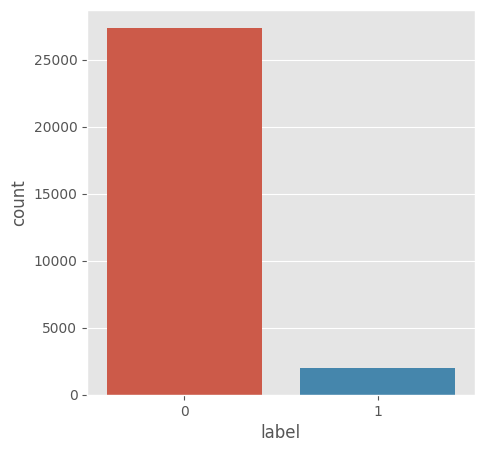

In [13]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data = df)

Text(0.5, 1.0, 'Distribution of HATE SPEECH')

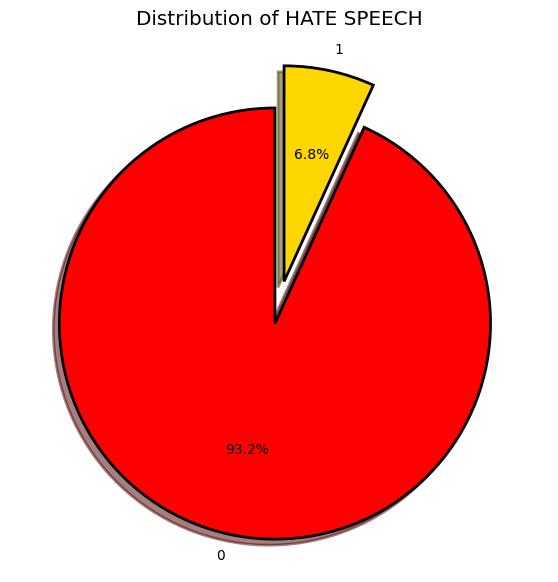

In [14]:
fig = plt.figure(figsize=(7,7))
colors = ("red","gold")
wp = {'linewidth':2,'edgecolor':"black"}
tags = df['label'].value_counts()
explode = (0.1,0.1)
tags.plot(kind='pie',autopct = '%1.1f%%',shadow=True,colors=colors,startangle=90,wedgeprops=wp,explode=explode,label='')
plt.title('Distribution of HATE SPEECH')

In [15]:
non_hate_tweet = df[df.label == 0]
non_hate_tweet.head()

,id,label,tweet
0,1,0,user father dysfunctional selfish drags kids d...
1,2,0,user user thanks lyft credit cant use cause do...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


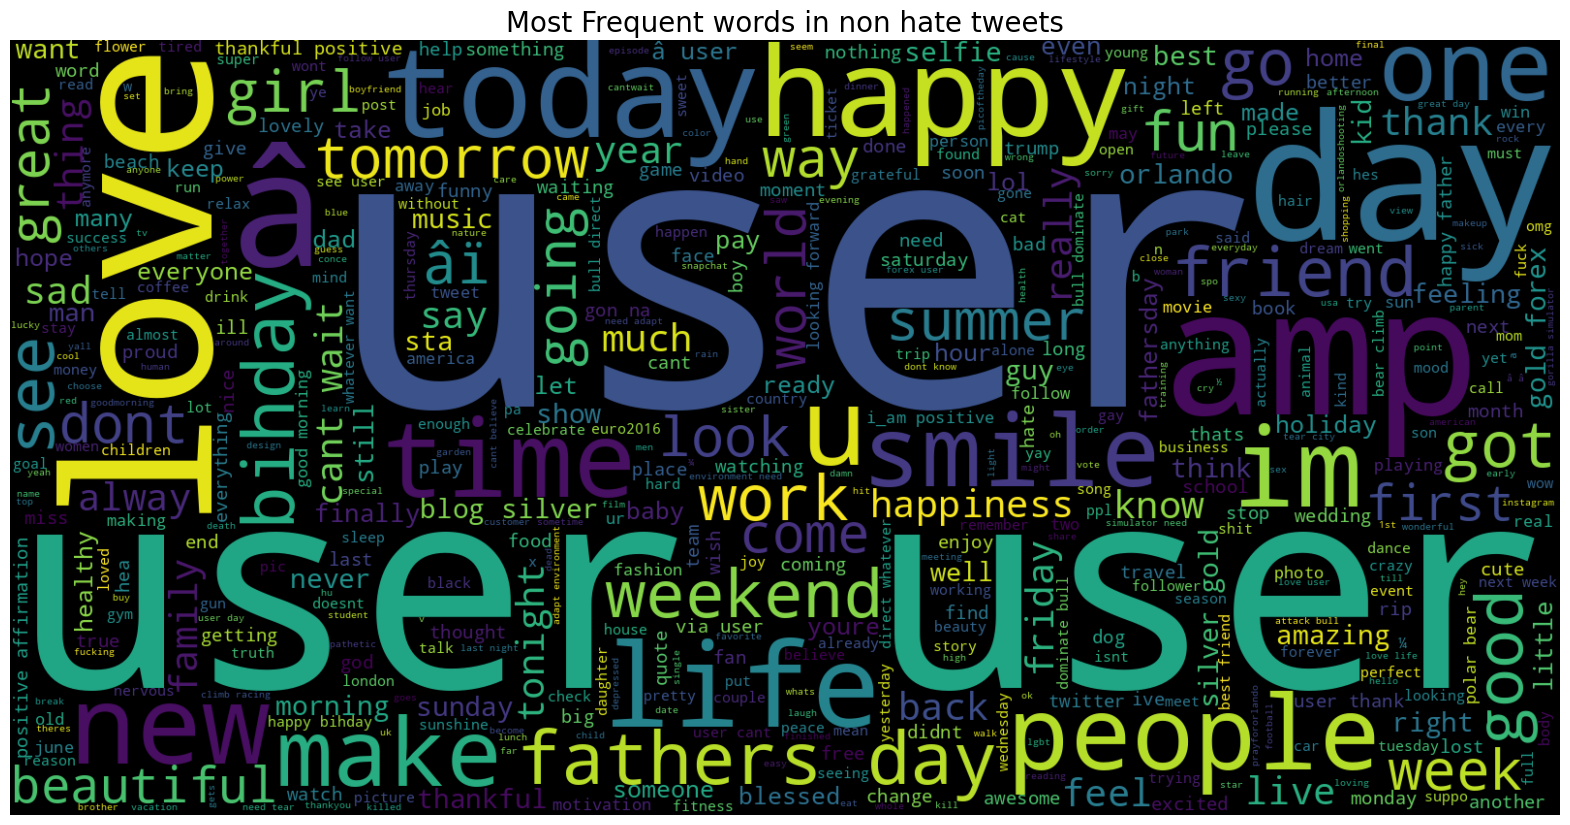

In [16]:
text = ' '.join([word for word in non_hate_tweet['tweet']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud = WordCloud(max_words = 500, width = 1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent words in non hate tweets',fontsize = 20)
plt.show()